In [2]:
#!pip install pandas 

In [2]:
#!pip install numpy

In [3]:
#!pip install seaborn

In [4]:
#!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score




from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'pandas'

In [ ]:
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return accuracy, f1, precision, recall


In [ ]:
df = pd.read_csv("/Applications/cleaned_transactions.csv")
df_features = df.drop(columns=['TRANSACTION_ID', 'TX_FRAUD', 'TX_DATETIME', 'Unnamed: 0', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_FRAUD_SCENARIO'])

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_features)

your_features = standardized_features
your_labels = df['TX_FRAUD']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(your_features, your_labels, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
    
}

model_list = []
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy_train, f1_train, precision_train, recall_train = evaluate_classification_model(y_train, y_train_pred)
    accuracy_test, f1_test, precision_test, recall_test = evaluate_classification_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- F1 Score: {:.4f}".format(f1_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- F1 Score: {:.4f}".format(f1_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))

    accuracy_list.append(accuracy_test)
    f1_list.append(f1_test)
    precision_list.append(precision_test)
    recall_list.append(recall_test)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.6167
- F1 Score: 0.5560
- Precision: 0.6603
- Recall: 0.4802
----------------------------------
Model performance for Test set
- Accuracy: 0.6164
- F1 Score: 0.5564
- Precision: 0.6602
- Recall: 0.4808


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.9919
- F1 Score: 0.9920
- Precision: 0.9841
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9879
- F1 Score: 0.9881
- Precision: 0.9764
- Recall: 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9961
- F1 Score: 0.9961
- Precision: 0.9923
- Recall: 1.0000


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test s

In [ ]:
df = pd.read_csv('/Users/mac/Desktop/cleaned_transactions.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0      40.58         12811468           148
1     131.79          7286693            84
2     285.15         12153662           140
3      93.70         10209529           118
4     229.00         11266962           130


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

In [ ]:
df = pd.read_csv("/Users/mac/Desktop/cleaned_transactions.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)

X = standardized_features
y = df["TX_FRAUD"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((2783156, 3), (695790, 3))

In [ ]:

models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {acc:.3f}")

Logistic Regression accuracy: 0.618
K-Nearest Neighbors accuracy: 0.988
Decision Tree accuracy: 0.996
Random Forest accuracy: 0.999
Gradient Boosting accuracy: 0.636


In [ ]:
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, y_test)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
model = DecisionTreeClassifier(max_depth= None, min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

y_pred_DTC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_DTC)
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_DTC)

Decision Tree Classifier:
Accuracy: 0.9963566593368689
Confusion Matrix:
 [[346231   2535]
 [     0 347024]]


In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_RFC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Random Forest Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_RFC)


Random Forest Classifier:
Accuracy: 0.9993288204774429
Confusion Matrix:
 [[348299    467]
 [     0 347024]]


Text(0.5, 1.0, 'Confusion Matrix: Decision Tree Classifier')

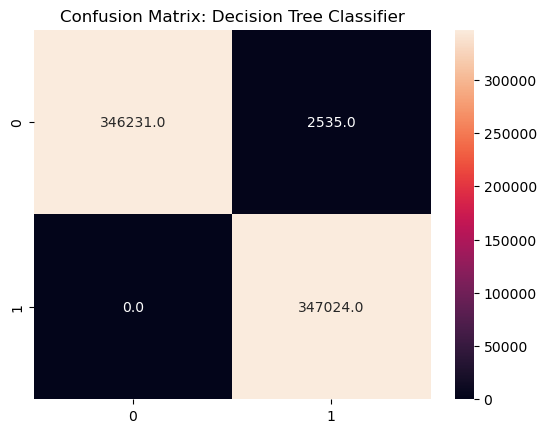

In [ ]:
cm_sns_DTC = sns.heatmap(cm_DTC,annot=True,fmt='.1f')
cm_sns_DTC.set_title('Confusion Matrix: Decision Tree Classifier')

Text(0.5, 1.0, 'Confusion Matrix: Random Forest Classifier')

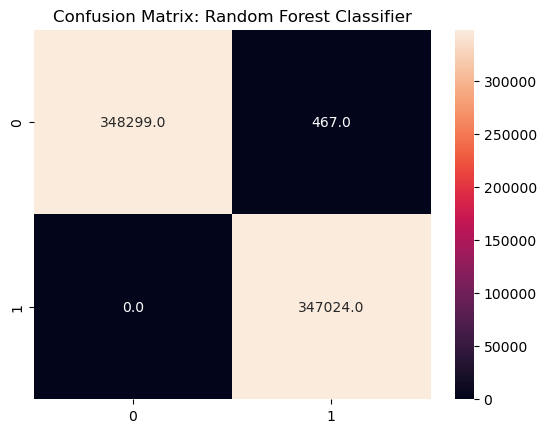

In [ ]:
cm_sns_RFC = sns.heatmap(cm_RFC,annot=True,fmt='.1f')
cm_sns_RFC.set_title('Confusion Matrix: Random Forest Classifier')

In [ ]:
precision_DTC = precision_score(y_test, y_pred_DTC)
recall_DTC = recall_score(y_test, y_pred_DTC)
f1_DTC = f1_score(y_test, y_pred_DTC)
print("Decision Tree Classifier:")
print("Precision: ", precision_DTC)
print("Recall: ", recall_DTC)
print("F1-Score: ", f1_DTC)

Decision Tree Classifier:
Precision:  0.9927480053438762
Recall:  1.0
F1-Score:  0.9963608069677268


In [ ]:
precision_RFC = precision_score(y_test, y_pred_RFC)
recall_RFC = recall_score(y_test, y_pred_RFC)
f1_RFC = f1_score(y_test, y_pred_RFC)
print("Random Forest Classifier")
print("Precision: ", precision_RFC)
print("Recall: ", recall_RFC)
print("F1-Score: ", f1_RFC)

Random Forest Classifier
Precision:  0.9986560803013603
Recall:  1.0
F1-Score:  0.9993275883170271


In [ ]:
classifiers = ['Decision Tree Classifier', 'Random Forest Classifier']
metrics = ['Precision', 'Recall', 'F1-Score']

df = pd.DataFrame({'Classifier': [classifiers[0]]*3 + [classifiers[1]]*3,
                   'Metrics': metrics*2,
                   'Score': [precision_DTC, recall_DTC, f1_DTC, precision_RFC, recall_RFC, f1_RFC]})

fig = px.bar(df, x='Classifier', y='Score', color='Metrics', barmode='group',
             height=400, width=600, title="Classifier Performance Metrics")

fig.update_layout(xaxis=dict(categoryorder='category ascending'))
fig.update_traces(customdata=df['Score'],texttemplate='%{customdata}', textposition='auto', textfont=dict(size=8))
fig.update_traces(text=df['Score'], texttemplate='%{text}', textposition='outside', textfont=dict(size=8))
fig.update_traces(hovertemplate='%{x}<br>Score: %{y:.4f}<extra></extra>')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_traces(text=df['Score'].round(2).astype(str), texttemplate='%{text:.4f}', textposition='outside', textfont=dict(size=8))
fig.show()

In [ ]:
average_precision = average_precision_score(y_test, y_pred_DTC)

print("Average precision-recall score: {:.2f}".format(average_precision))

Average precision-recall score: 0.99


In [ ]:
average_precision_RFC = average_precision_score(y_test, y_pred_RFC)

print("Average precision-recall score: {:.2f}".format(average_precision))

Average precision-recall score: 0.99
